## Importer les bibliotéque

In [113]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Charger mon dataframe

In [114]:
df_banque = pd.read_csv("../data/creditcard.csv")

In [115]:
df_banque.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Analyser mon dataframe

In [116]:
df_banque.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [117]:
# 
print("ligne_colonne :" , df_banque.shape , "   ", df_banque.size)

ligne_colonne : (284807, 31)     8829017


In [118]:
df_banque.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [119]:
#Vérifier sil ya des valeur maquante
df_banque.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Traitement du dataframe

In [120]:
df_banque["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [121]:
df_banque.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Analyse de données et tracer un graphe

 Regarder les valeurs des données pour comprendre les données, et essayer de trouver des correlations

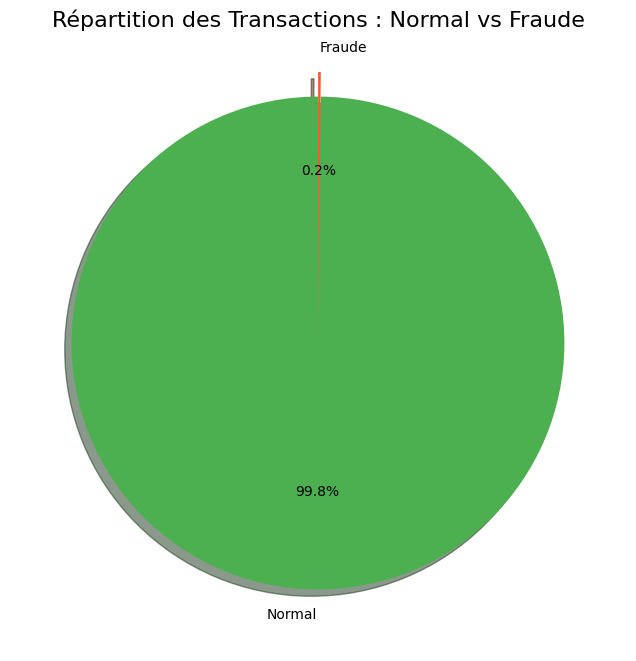

In [122]:
# Compter les transactions normales et frauduleuses
type_transaction = df_banque["Class"].value_counts()

# Définir les couleurs
colors = ["#4CAF50", "#FF5722"]  # Vert pour normal, rouge pour frauduleux

# Créer le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(
    type_transaction,
    labels=["Normal", "Fraude"],  # Ajout de labels explicites
    autopct='%1.1f%%',  # Pour afficher les pourcentages
    colors=colors,
    startangle=90,  # Orientation initiale
    explode=(0, 0.1),  # Séparer légèrement la catégorie "Fraude"
    shadow=True,  # Ajouter une ombre pour un effet 3D
)

# Ajouter un titre
plt.title("Répartition des Transactions : Normal vs Fraude", fontsize=16)

# Afficher le graphique
plt.show()


In [123]:
type_transaction[0]

np.int64(284315)

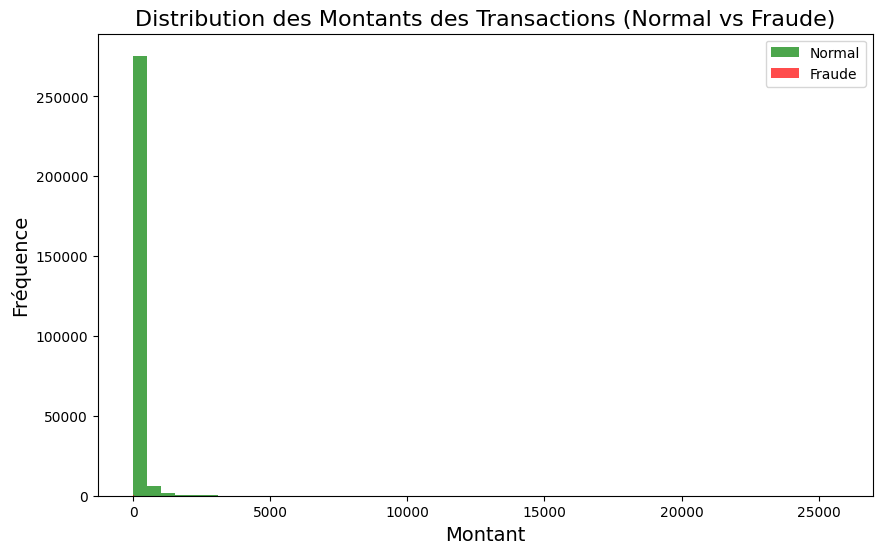

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(df_banque[df_banque['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='green')
plt.hist(df_banque[df_banque['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraude', color='red')
plt.title("Distribution des Montants des Transactions (Normal vs Fraude)", fontsize=16)
plt.xlabel("Montant", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.legend()
plt.show()


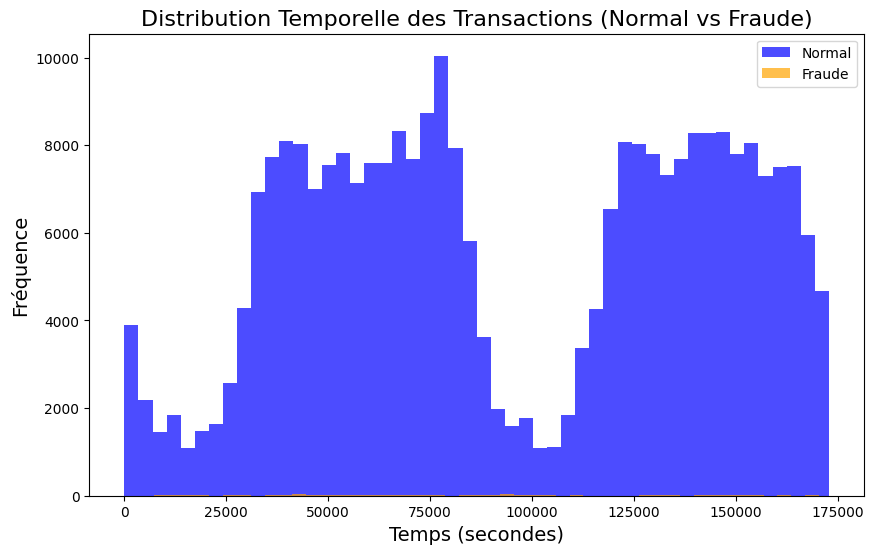

In [125]:
plt.figure(figsize=(10, 6))
plt.hist(df_banque[df_banque['Class'] == 0]['Time'], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(df_banque[df_banque['Class'] == 1]['Time'], bins=50, alpha=0.7, label='Fraude', color='orange')
plt.title("Distribution Temporelle des Transactions (Normal vs Fraude)", fontsize=16)
plt.xlabel("Temps (secondes)", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.legend()
plt.show()


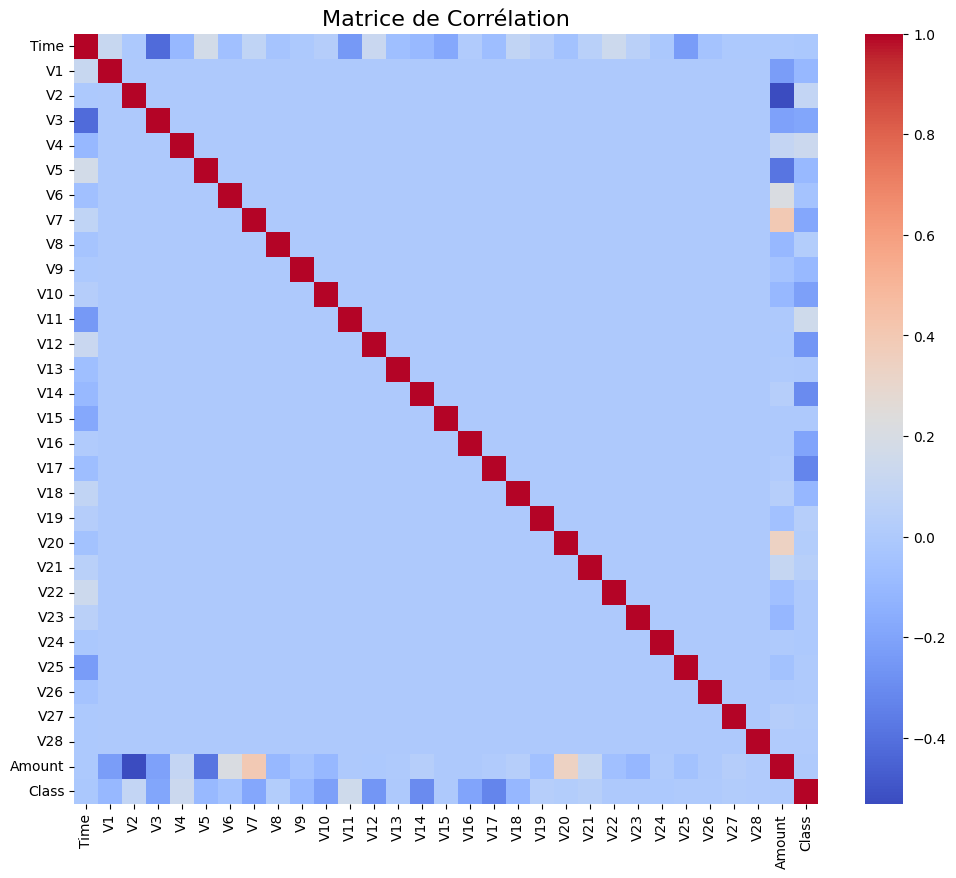

In [126]:
plt.figure(figsize=(12, 10))
corr_matrix = df_banque.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Matrice de Corrélation", fontsize=16)
plt.show()


In [127]:
# ## Représentation graphique de mes données
# plt.figure(figsize=(10, 7))
# sns.pairplot(data=df_banque, hue='Travel_Time', palette='coolwarm')
# plt.legend()
# plt.show()

## Divison de mon dataset

In [128]:
y = df_banque["Class"]
x = df_banque.drop("Class" , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x, y ,  test_size=0.2 , random_state=42 )

## model

In [ ]:
## utilsier un model 
model = LinearRegression()

##entrainer les données

model.fit(x_train , y_train)



array([ 1.21818471e+00, -5.77778635e-04, -7.26429735e-04, ...,
        1.32486993e-03,  1.08120824e-03,  5.02171210e-03])

## Prédiction du model 

In [130]:
y_pred = model.predict(x_test)

y_pred

array([ 1.21818471e+00, -5.77778635e-04, -7.26429735e-04, ...,
        1.32486993e-03,  1.08120824e-03,  5.02171210e-03])

## Evaluation de mon modèle

In [132]:
R2 = model.score(x_test , y_test)

R2

0.5166663660896538